In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/bzaharatos/-Statistical-Modeling-for-Data-Science-Applications/master/Modern%20Regression%20Analysis%20/Datasets/marketing.txt"
marketing = pd.read_csv(url, sep="\t")


The following dataset containts measurements related to the impact of three advertising medias on sales of a product,  𝑃
 * The variables are:

`youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

`facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and

`newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

`sales`: the value in the  𝑖𝑡ℎ
  row of the sales column is a measurement of the sales (in thousands of units) for product  𝑃
  for company  𝑖
 .

The advertising data treat "a company selling product  𝑃
 " as the statistical unit, and "all companies selling product  𝑃
 " as the population. We assume that the  𝑛=200
  companies in the dataset were chosen at random from the population (a strong assumption!).

In [2]:
marketing.head()

,youtube,facebook,newspaper,sales
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48


In [3]:
marketing.shape

(200, 4)

## EDA 

1. **Check Null Values**
2. **Univariate EDA**
3. **Outlier Analysis**
4. **Bivariate EDA**

In [4]:
import pandas as pd
import numpy as np

# Assuming 'marketing' is a pandas DataFrame

num_rows, num_cols = marketing.shape

print("There are", marketing.isna().sum().sum(), "missing data values.")

# summary(marketing)
summary = marketing.describe()
print(summary)


There are 0 missing data values.
          youtube    facebook   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   176.451000   27.916800   36.664800   16.827000
std    103.025084   17.816171   26.134345    6.260948
min      0.840000    0.000000    0.360000    1.920000
25%     89.250000   11.970000   15.300000   12.450000
50%    179.700000   27.480000   30.900000   15.480000
75%    262.590000   43.830000   54.120000   20.880000
max    355.680000   59.520000  136.800000   32.400000


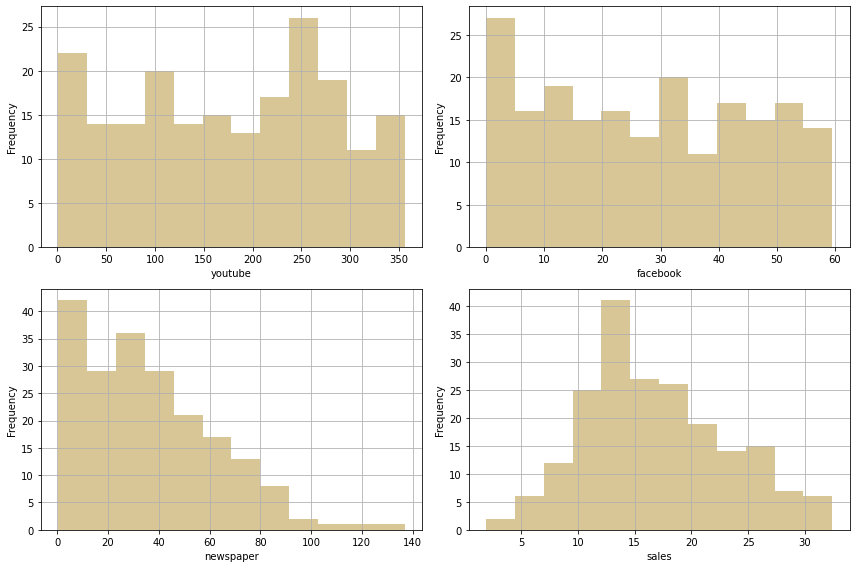

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the variables
# 'youtube', 'facebook', 'newspaper', and 'sales'

variables = ['youtube', 'facebook', 'newspaper', 'sales']

plt.figure(figsize=(12, 8))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.hist(marketing[var], bins=12, color='#CFB87C', alpha=0.8)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()




The histograms of each variable provide insight into the distributions of the variables. None look normal; however, there is no requirement that the predictors (facebook, youtube, newspaper) come from a normal distribution.

The response, sales does not look all that normal, but as we'll see, some regression analyses can be fairly robust to deviations in the normality assumption.

We can see from the histogram of `newspaper` that there may be a few outliers. Let's look at some boxplots to see in further detail. Note that 

**"IQR criterion"**. This criterion means that all observations above $q_{0.75}+1.5\times IQR$ or below $q_{0.25}-1.5\times IQR$ are classified as outliers, where 

- $q_{0.25}$ is the first quartile;
- $q_{0.75}$ is the third quartile. 
- IQR is the interquartile range, defined as the difference between the third and first quartile. 

A boxplot wil "flag" the outliers:

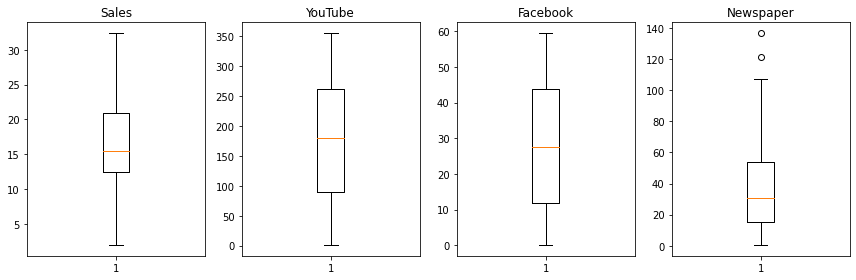

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data frame is named "marketing"
plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.boxplot(marketing['sales'])
plt.title('Sales')

plt.subplot(142)
plt.boxplot(marketing['youtube'])
plt.title('YouTube')

plt.subplot(143)
plt.boxplot(marketing['facebook'])
plt.title('Facebook')

plt.subplot(144)
plt.boxplot(marketing['newspaper'])
plt.title('Newspaper')

plt.tight_layout()
plt.show()


In [8]:

import numpy as np

newspaper_data = marketing['newspaper']

# Calculate IQR
q75, q25 = np.percentile(newspaper_data, [75, 25])
iqr = q75 - q25

# Set the threshold as a multiple of IQR
threshold = 1.5

# Identify outliers
lower_bound = q25 - (threshold * iqr)
upper_bound = q75 + (threshold * iqr)
outliers = newspaper_data[(newspaper_data < lower_bound) | (newspaper_data > upper_bound)]

print("The outliers for the Newspaper variable are:", outliers.tolist())


The outliers for the Newspaper variable are: [136.8, 121.08]


In [7]:
import numpy as np

newspaper_data = marketing['newspaper']
mean = np.mean(newspaper_data)
std = np.std(newspaper_data)

threshold = 3  # Adjust the threshold as needed

outliers = newspaper_data[(newspaper_data - mean) / std > threshold]
print("The outliers for the Newspaper variable are:", outliers.tolist())


The outliers for the Newspaper variable are: [136.8, 121.08]


Using the interquartile range criterion, we see that newspaper has two potential outliers. We simply note this for now, and note that outliers can impact the fit of a regression.

## Bivariate EDA

Let's now explore how the variables may or may not relate to each other. First, calculate the correlations between variables. Correlations can help us meaasure the strength of the linear relationship between variables. We'll do this with the corrplot() function.

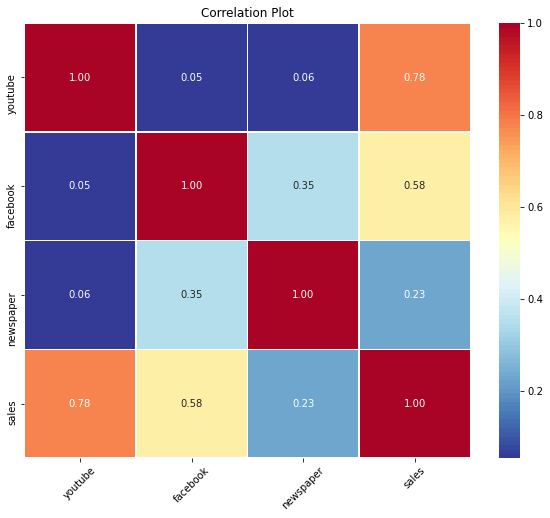

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named "marketing"
corr_matrix = marketing.corr()

# Set up the color palette
colors = sns.color_palette("RdYlBu_r", n_colors=100)

# Create the correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap=colors, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot")

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

plt.show()


Note that there's a relatively strong correlation between sales and youtube, and sales and facebook. However, knowing correlations alone isn't enough; the correlation coefficient can be misleading if there are nonlinear relationships, and so we should explore the relationships further.

To do so, we'll look at pairwise scatter plots, i.e., a scatter plot of each variable with each other variable. We should be looking for:

Relationships between the response and each predictor.
Relationships between predictor variables. Such relationships are undesirable.

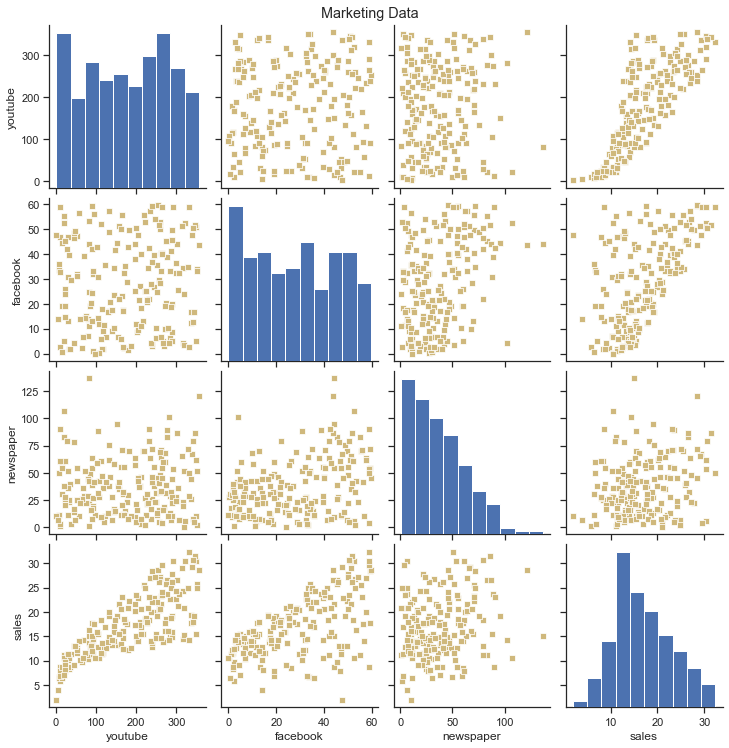

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "marketing"
sns.set(style="ticks")
sns.pairplot(marketing, markers="s", plot_kws={"color": "#CFB87C"})
plt.suptitle("Marketing Data", y=1.02)
plt.show()


Here are some notes on the relationships:

The relationship between sales and youtube appears nonlinear, with a sharp increase in sales for a small increase in YouTube advertising in the lower range of youtube. As more money is spent on YouTube advertising, however, the increase in sales is less prevalent.

It's also worth noting that, as youtube increases, the variability in sales also increases.

There appears to be a linear relationship between sales and facebook, too, but with a lot of variability, especially for high vales of facebook and low sales.

There doesn't appear to be a relationship between sales and newspaper.

There aren't any other strong trends in the data.

## Sums of squares and  𝑅2   for simple linear regression
 The analysis of variance decomposes the total variability ( 𝑇𝑆𝑆 ) into the explained variability ( 𝐸𝑆𝑆  ), and the residual/unexplained variability ( 𝑅𝑆𝑆  ).

## Sums of squares and 𝑅2 for Multiple linear regression

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming your DataFrame is named "marketing" with columns "sales", "facebook", "youtube", and "newspaper"
lm_marketing_MLR = smf.ols(formula="sales ~ facebook + youtube + newspaper", data=marketing).fit()

# Summary statistics
print(lm_marketing_MLR.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        14:25:40   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.0

First, note that the intercept and `facebook` parameter estimates have changed. The reason for these changes is the fact that we've now introduced new variables that explain some variability in `sales`. 

- If the model is correct, a company with no Facebook, YouTube, or newspaper advertising budget can expect to sell $\widehat\beta_0 \times 1,000 \approx 3.53 \times 1,000 = 3,530$ units of product $P$. Notice that this is down from $\approx 11,174$ units in our previous simple linear regression model. Different models can have very different predictions and explanations, so it's important to attempt to find a good model! We'll focus more on the problem of model selection later in the course.

- If the model is correct, then, for a $\$1,000$ increase in the Facebook advertising budget, a company can expect to sell roughly $\widehat\beta_1 \times 1000 = 0.19 \times 1,000 = 190$ more unts, on average, *adjusting for YouTube and newspaper advertising budgets.* The adjustment is important: what we mean here is that the YouTube and newspaper advertising budgets can be held at a constant value, and the $190$ unit change is the specific change associated with the Facebook advertising budget. (Similar interpretations can be made for `youtube` and `newspaper`.)

- Recall the interpretation of "multiple R-squared", $R^2$: assuming the linear model is correct, $R^2$ is the proportion of observed variability in `sales` that can be explained by the linear regression model. 
    - For the simple linear regression model, $R^2 \approx 0.33$. Assuming that the model is correct (but it likely isn't!), only about $33\%$ of the variability in sales of $P$ can be explained by the Facebook advertising budget. 

    - For the multiple linear regression model, $R^2$ increases sharply to $0.90$. We should be caseful in comparing $R^2$ across models with a different number of predictors; $R^2$ will always increase when adding a predictor. What we'd really like to know is whether that increase is important enough to attribute to a real relationship between the added precitors and the response. 
    
    - "Adjusted-$R^2$", which adjusts for the number of predictors in each model, is meant to compare models of different sizes. The sharp increase in the adjusted-$R^2$ suggests that adding `youtube`  and `newspaper` did, in fact, explain significantly more of the variability. We'll study the adjusted- $R^2$ more later in the course.

In [15]:
import statsmodels.api as sm
import numpy as np

# Assuming you have already fitted the multiple linear regression model "lm_marketing_MLR"

# Perform ANOVA
anova_results = sm.stats.anova_lm(lm_marketing_MLR)
print(anova_results)

# Calculate ess
ess = np.sum((lm_marketing_MLR.fittedvalues - np.mean(marketing['sales']))**2)

# Calculate rss
rss = np.sum(lm_marketing_MLR.resid**2)

# Calculate tss
tss = np.sum((marketing['sales'] - np.mean(marketing['sales']))**2)

# Calculate r2
r2 = 1 - rss/tss

# Calculate sigma
sigma = np.sqrt(rss / (len(marketing) - len(lm_marketing_MLR.params) - 1))

# Print the results
print("The explained sum of squares is", round(ess, 2))
print("The residual sum of squares is", round(rss, 2))
print("The total sum of squares is", round(tss, 2))
print("The coefficient of determination is", round(r2, 2))
print("The estimate of the error standard deviation is", round(sigma, 2))


              df       sum_sq      mean_sq            F        PR(>F)
facebook     1.0  2590.083649  2590.083649   633.123507  2.688795e-63
youtube      1.0  4408.654419  4408.654419  1077.657376  1.371149e-81
newspaper    1.0     0.127753     0.127753     0.031228  8.599151e-01
Residual   196.0   801.828379     4.090961          NaN           NaN
The explained sum of squares is 6998.87
The residual sum of squares is 801.83
The total sum of squares is 7800.69
The coefficient of determination is 0.9
The estimate of the error standard deviation is 2.03


In [16]:
marketing.head()

,youtube,facebook,newspaper,sales
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48


In [17]:
## Independent features and dependent features
X=marketing[['facebook','youtube']]
y=marketing[['sales']]

In [18]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [20]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [21]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [22]:
np.mean(mse)

-4.156831606989653

In [23]:
##prediction 
reg_pred=regression.predict(X_test)

In [41]:
reg_pred
y_test

,sales
96,20.28
16,26.88
31,25.68
159,8.76
129,29.64
116,15.12
70,26.76
171,10.08
175,13.80
46,17.88


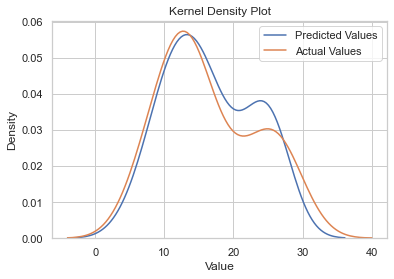

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example predicted values and actual values
pred_values   =  reg_pred.flatten()
actual_values =  y_test['sales'].values.flatten()

# Calculate the residuals
residuals = pred_values - actual_values

# Plot the kernel density estimate of residuals
sns.kdeplot(data=pred_values, label='Predicted Values')
sns.kdeplot(data=actual_values, label='Actual Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Plot')
plt.legend()
plt.show()


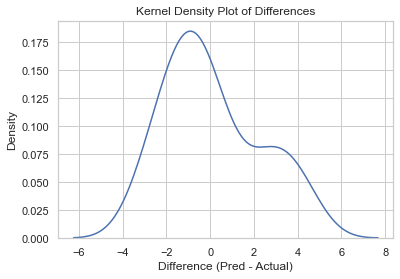

In [44]:
# Plot the KDE of the differences
sns.kdeplot(data=pred_values-actual_values)
plt.xlabel('Difference (Pred - Actual)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Differences')
plt.show()

In [38]:
#NEW Code 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data with outliers
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([2, 4, 6, 9, 11, 13, 15, 40, 19, 21])  # Added outlier at Y[7]

# Calculate the mean of Y
Y_mean = np.mean(Y)

# Calculate the coefficients of the linear regression line (y = mx + c)
m = np.sum((X - np.mean(X)) * (Y - Y_mean)) / np.sum((X - np.mean(X))**2)
c = Y_mean - m * np.mean(X)

# Calculate the predicted values
Y_pred = m * X + c

# Calculate the ESS, RSS, and TSS
ESS = np.sum((Y_pred - Y_mean)**2)
RSS = np.sum((Y - Y_pred)**2)
TSS = np.sum((Y - Y_mean)**2)

# Plot the linear regression line
plt.scatter(X, Y, color='red', label='Data Points')
plt.plot(X, Y_pred, color='blue', label='Regression Line')

# Plot residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y_pred[i], Y[i]], color='green')

# Plot the y-mean line
plt.axhline(y=Y_mean, color='orange', linestyle='--', label='Y Mean')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print ESS, RSS, and TSS
print(f'ESS: {ESS}')
print(f'RSS: {RSS}')
print(f'TSS: {TSS}')
